<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h1>Spaceship Titanic | Classification Model in Kaggle</h1><br>

Hult International Business School<br>
San Francisco Team 8<br>
Alexandra George, Ejiofor Chukwuelue, Hayata Nakamura, Takashi Konishi, Vaibhav Srivastava<br><br>


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

## Purpose of this script
<br>
- Script for a predictive model for binary classification using the Spaceship Titanic dataset. The goal is to predict whether the passengers were sent to another dimension when the spaceship Titanic collided with a space-time anomaly.<br><br>

- This script covers the following:

    - Exploratory data analysis (EDA)
    - Data cleaning
    - Feature engineering including encoding, scaling, and pre-processing
    - Develop model (only the best model)
    - Creating and Submitting Predictions
<br><br>
- Throughout the competition, we created a total of seven models, both nonparametric and parametric, but this script is a compact version that selects only our highest scoring models. <br><br>
- The processes of hyperparameter tuning, cross-validation are also omitted in this script.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

## Import Data & Preparation

Below is a starter code that comes with Jupyter Notebook.

In [1]:
# Import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt                         # data visualization
import seaborn as sns                                   # enhanced data viz

import sklearn.linear_model                             # linear modeling in scikit-learn
import statsmodels.formula.api as smf                   # logistic regression

from sklearn.tree import DecisionTreeClassifier         # classification trees
from sklearn.tree import plot_tree                      # tree plots

from sklearn.model_selection import train_test_split    # train-test split
from sklearn.model_selection import RandomizedSearchCV  # tuning hyperparameters

import sklearn.ensemble

# from sklearn.ensemble import RandomForestRegressor      # random forest
# from sklearn.ensemble import GradientBoostingRegressor  # gbm

from sklearn.metrics import roc_auc_score               # auc score
from sklearn.metrics import confusion_matrix            # confusion matrix


# Set pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#########################################################
#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))
#########################################################
        
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br><br>
- Importing any additional libraries

In [2]:
# modeling library
import sklearn.linear_model                          # linear modeling in scikit-learn
import statsmodels.formula.api as smf                # logistic regression

# other model building tools
from sklearn.model_selection import train_test_split # train-test split
from sklearn.metrics import roc_auc_score            # auc score

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br><br>
- Telling Python the path to your training data

In [3]:
# importing the training dataset
#path             = "/kaggle/input/spaceship-titanic/"
path             = "./"
training_dataset = "train.csv"


# reading in the .csv file with pandas
titanic_train    = pd.read_csv(filepath_or_buffer = path + training_dataset)


# checking basic info about the dataset
titanic_train.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
# seeing the first 5 rows
titanic_train.head(n=5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
The test set is also available. Notice that there is no data for Transported (y-variable) in the test set. This is intentional.<br>

In [5]:
# importing the training dataset
# path             = "/kaggle/input/spaceship-titanic/"
path             = "./"
testing_dataset  = 'test.csv'

# importing the testing dataset
titanic_test = pd.read_csv(filepath_or_buffer = path + testing_dataset)

# checking basic info about the dataset
titanic_test.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [6]:
# seeing the first 5 rows
titanic_test.head(n=5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
- Joining the datasets together before feature engineering

In [7]:
titanic_train['set'] = 'Training'
titanic_test ['set'] = 'Testing'

# concatenating both datasets together for mv and feature engineering
titanic_df = titanic_train.append(other = titanic_test)

# resetting index to avoid problems later in the code
titanic_df.reset_index(drop = False,
                       inplace = True)

# displaying
titanic_df.head(5)

C:\Users\dell\AppData\Local\Temp\ipykernel_9936\796675989.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  titanic_df = titanic_train.append(other = titanic_test)


,index,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,set
0,0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,Training
1,1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,Training
2,2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,Training
3,3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,Training
4,4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,Training


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

## EDA & Data Cleaning

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
Let's check and quantify missing values.<br>

In [8]:
# checking all the columns which have missing values
titanic_df.isnull().sum()

index              0
PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
set                0
dtype: int64

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
Let's categorize them into NUMERICAL and CATEGORICAL.<br>

In [9]:
# check numerical features
num_features=titanic_df.describe().columns.tolist()
print(num_features)

# check categorical features
cat_features=[feature for feature in titanic_df.columns if feature not in num_features]
print(cat_features)

['index', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name', 'Transported', 'set']


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
Let's handle missing values in numerical features.<br>

In [10]:
# replace missing numerical values with median of each feature
for feature in num_features:
    value=titanic_df[feature].median()
    titanic_df[feature].fillna(value=value,inplace=True)


# check the # of missing values
titanic_df.isnull().sum()

# all the numerical columns are filled no missing values(catergoical features still have missing values)

index              0
PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age                0
VIP              296
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Name             294
Transported     4277
set                0
dtype: int64

In [11]:
# replace missing categorical values with median of each feature
for feature in cat_features:
    value=titanic_df[feature].mode()[0]  # use [0] because we can have multimodal data
    titanic_df[feature].fillna(value=value,inplace=True)

# check the # of missing values
titanic_df.isnull().sum()

# all the numerical columns are filled no missing values

index           0
PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
set             0
dtype: int64

In [12]:
# comprehending the description of dataset
titanic_df.describe()

,index,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000
mean,3617.887741,28.735081,218.378026,441.890979,170.779491,301.722282,300.450270
std,2408.607419,14.238958,641.766201,1568.038076,584.153630,1118.746785,1168.655639
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1621.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3242.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5449.750000,37.000000,42.750000,62.750000,23.000000,50.000000,36.000000
max,8692.000000,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


- dealing with outlier

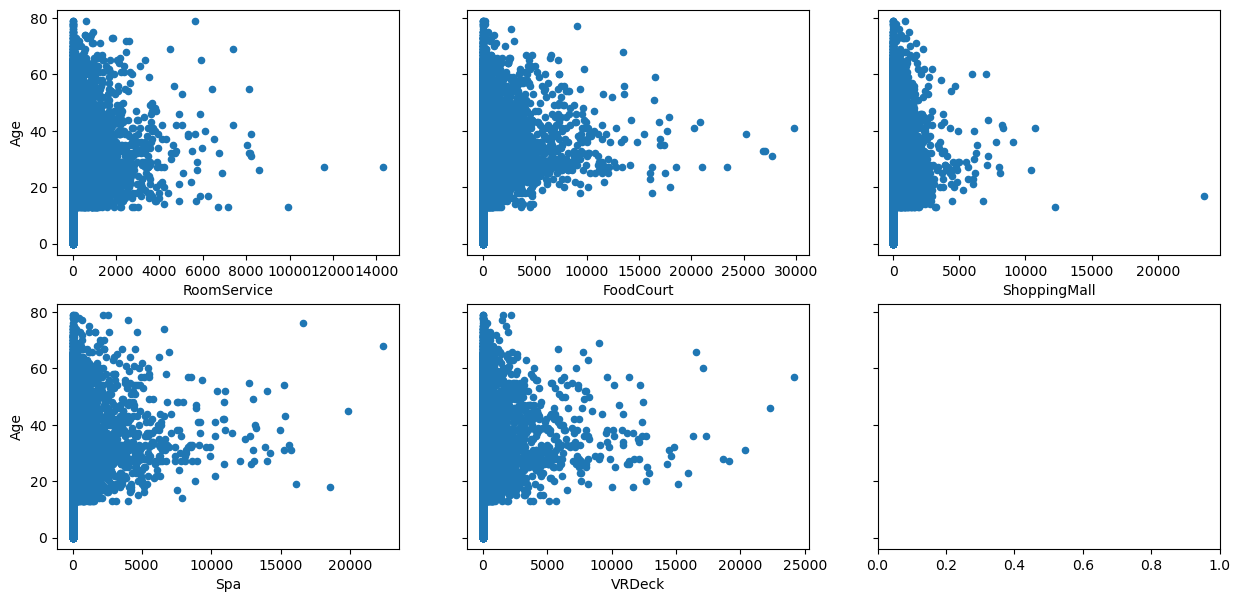

In [13]:
# Looking for outliers
fig, axes = plt.subplots(2, 3, sharey=True, figsize=(15, 7))
titanic_df.plot.scatter(x='RoomService', y='Age', ax=axes[0, 0])
titanic_df.plot.scatter(x='FoodCourt', y='Age', ax=axes[0, 1])
titanic_df.plot.scatter(x='ShoppingMall', y='Age', ax=axes[0, 2])
titanic_df.plot.scatter(x='Spa', y='Age', ax=axes[1, 0])
titanic_df.plot.scatter(x='VRDeck', y='Age', ax=axes[1, 1])
plt.show()

In [14]:
# Cap RoomService at 5000
titanic_df.loc[titanic_df.RoomService.gt(5000), 'RoomService'] = 5000

# Cap FoodCourt at 12500
titanic_df.loc[titanic_df.FoodCourt.gt(12500), 'FoodCourt'] = 12500

# Cap ShoppingMall at 5000
titanic_df.loc[titanic_df.ShoppingMall.gt(5000), 'ShoppingMall'] = 5000

# Cap Spa at 7500
titanic_df.loc[titanic_df.Spa.gt(7500), 'Spa'] = 7500

# Cap VRDeck at 10000
titanic_df.loc[titanic_df.VRDeck.gt(10000), 'VRDeck'] = 10000

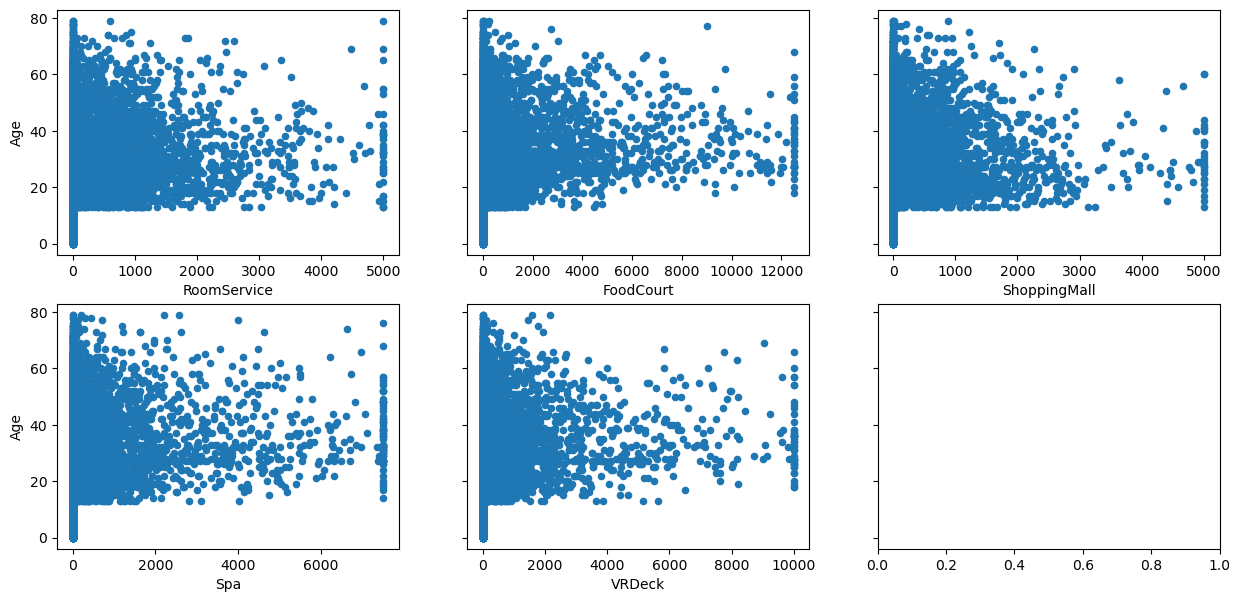

In [15]:
# Looking for outliers
fig, axes = plt.subplots(2, 3, sharey=True, figsize=(15, 7))
titanic_df.plot.scatter(x='RoomService', y='Age', ax=axes[0, 0])
titanic_df.plot.scatter(x='FoodCourt', y='Age', ax=axes[0, 1])
titanic_df.plot.scatter(x='ShoppingMall', y='Age', ax=axes[0, 2])
titanic_df.plot.scatter(x='Spa', y='Age', ax=axes[1, 0])
titanic_df.plot.scatter(x='VRDeck', y='Age', ax=axes[1, 1])
plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

## Feature Engineering & Data-Type Transformation

**PassengerID**

In [16]:
# Make a passenger ID column
titanic_df['Passenger_ID'] = titanic_df['PassengerId'].str[0:4]

# transform the data type of Group Number
titanic_df['PassengerID'] = titanic_df['Passenger_ID'].astype(float)

# drop the unused column 
titanic_df = titanic_df.drop('Passenger_ID', axis = 1)

# check
titanic_df.head(n=5)

,index,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,set,PassengerID
0,0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,Training,1.0
1,1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,Training,2.0
2,2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,Training,3.0
3,3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,Training,3.0
4,4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,Training,4.0


**GroupNumber**

In [17]:
# checking the latest letter of the column
titanic_df['group_number'] = titanic_df['PassengerId'].str[-1:]

# checking the unique values of the column
unique_values_group = titanic_df['group_number'].unique()
print(unique_values_group)

['1' '2' '3' '4' '5' '6' '7' '8']


In [18]:
# create a new column for HomePlanet
titanic_df['group_number_int'] = np.nan
for i in range(len(titanic_df)):
    if titanic_df.loc[i, 'group_number'] == '1':
        titanic_df.loc[i, 'group_number_int'] = 0
    elif titanic_df.loc[i, 'group_number'] == '2':
        titanic_df.loc[i, 'group_number_int'] = 1
    elif titanic_df.loc[i, 'group_number'] == '3':
        titanic_df.loc[i, 'group_number_int'] = 2
    elif titanic_df.loc[i, 'group_number'] == '4':
        titanic_df.loc[i, 'group_number_int'] = 2
    elif titanic_df.loc[i, 'group_number'] == '5':
        titanic_df.loc[i, 'group_number_int'] = 1
    elif titanic_df.loc[i, 'group_number'] == '6':
        titanic_df.loc[i, 'group_number_int'] = 1
    elif titanic_df.loc[i, 'group_number'] == '7':
        titanic_df.loc[i, 'group_number_int'] = 1
    elif titanic_df.loc[i, 'group_number'] == '8':
        titanic_df.loc[i, 'group_number_int'] = 0


# print the dataframe
titanic_df.head(5)

,index,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,set,PassengerID,group_number,group_number_int
0,0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,Training,1.0,1,0.0
1,1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,Training,2.0,1,0.0
2,2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,Training,3.0,1,0.0
3,3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,Training,3.0,2,1.0
4,4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,Training,4.0,1,0.0


In [19]:
# drop the unused column 
titanic_df = titanic_df.drop('group_number', axis = 1)

**HomePlanet**

In [20]:
# checking the unique values of the column
unique_values_group = titanic_df['HomePlanet'].unique()
print(unique_values_group)

['Europa' 'Earth' 'Mars']


In [21]:
# create a new column for HomePlanet
titanic_df['HomePlanet_int'] = np.nan
for i in range(len(titanic_df)):
    if titanic_df.loc[i, 'HomePlanet'] == 'Europa':
        titanic_df.loc[i, 'HomePlanet_int'] = 3
    elif titanic_df.loc[i, 'HomePlanet'] == 'Earth':
        titanic_df.loc[i, 'HomePlanet_int'] = 1
    elif titanic_df.loc[i, 'HomePlanet'] == 'Mars':
        titanic_df.loc[i, 'HomePlanet_int'] = 2
        
# drop the unused column 
titanic_df = titanic_df.drop('HomePlanet', axis = 1)

# print the dataframe
titanic_df.head(5)

,index,PassengerId,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,set,PassengerID,group_number_int,HomePlanet_int
0,0,0001_01,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,Training,1.0,0.0,3.0
1,1,0002_01,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,Training,2.0,0.0,1.0
2,2,0003_01,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,Training,3.0,0.0,3.0
3,3,0003_02,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,Training,3.0,1.0,3.0
4,4,0004_01,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,Training,4.0,0.0,1.0


**CryopSleep**

In [22]:
# check the unique value of the column
unique_values_group = titanic_df['CryoSleep'].unique()
print(unique_values_group)

[False  True]


In [23]:
# Convert the boolean column to integer (1 for True, 0 for False)
titanic_df['CryoSleep'] = titanic_df['CryoSleep'].astype(float)

# Create dummy variables from the 'has_dog' column
#dummies = pd.get_dummies(titanic_df['CryoSleep'], prefix='CryoSleep')

# Concatenate the original dataframe with the dummy variables
#titanic_df = pd.concat([titanic_df, dummies], axis=1)

# drop the unused column 
#titanic_df = titanic_df.drop('CryoSleep', axis = 1)

# check
#titanic_df.head(n=5)

**Cabin**

In [24]:
# checking the unique values of the column
unique_values_group = titanic_df['Cabin'].unique()
print(unique_values_group)

# counting the numbers of values
titanic_df['Cabin'].count()

['B/0/P' 'F/0/S' 'A/0/S' ... 'D/296/P' 'D/297/P' 'G/1498/S']


12970

In [25]:
# split values based on '/'
titanic_df[['Cabin_deck', 'Cabin_num', 'Cabin_side']] = titanic_df['Cabin'].str.split('/', expand=True)

**Cabin_deck**

In [26]:
# check the unique value of the column
unique_values_group = titanic_df['Cabin_deck'].unique()
print(unique_values_group)

['B' 'F' 'A' 'G' 'E' 'D' 'C' 'T']


In [27]:
# create a new column for HomePlanet
titanic_df['Cabin_deck_int'] = np.nan
for i in range(len(titanic_df)):
    if   titanic_df.loc[i, 'Cabin_deck'] == 'A':
        titanic_df.loc[i, 'Cabin_deck_int'] = 2
    elif titanic_df.loc[i, 'Cabin_deck'] == 'B':
        titanic_df.loc[i, 'Cabin_deck_int'] = 3
    elif titanic_df.loc[i, 'Cabin_deck'] == 'C':
        titanic_df.loc[i, 'Cabin_deck_int'] = 3
    elif titanic_df.loc[i, 'Cabin_deck'] == 'D':
        titanic_df.loc[i, 'Cabin_deck_int'] = 1
    elif titanic_df.loc[i, 'Cabin_deck'] == 'E':
        titanic_df.loc[i, 'Cabin_deck_int'] = 0 
    elif titanic_df.loc[i, 'Cabin_deck'] == 'F':
        titanic_df.loc[i, 'Cabin_deck_int'] = 1
    elif titanic_df.loc[i, 'Cabin_deck'] == 'G':
        titanic_df.loc[i, 'Cabin_deck_int'] = 2 
    elif titanic_df.loc[i, 'Cabin_deck'] == 'T':
        titanic_df.loc[i, 'Cabin_deck_int'] = 0
        
# drop the unused column 
titanic_df = titanic_df.drop('Cabin_deck', axis = 1)

# print the dataframe
titanic_df.head(5)

,index,PassengerId,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,set,PassengerID,group_number_int,HomePlanet_int,Cabin_num,Cabin_side,Cabin_deck_int
0,0,0001_01,0.0,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,Training,1.0,0.0,3.0,0,P,3.0
1,1,0002_01,0.0,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,Training,2.0,0.0,1.0,0,S,1.0
2,2,0003_01,0.0,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,Training,3.0,0.0,3.0,0,S,2.0
3,3,0003_02,0.0,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,Training,3.0,1.0,3.0,0,S,2.0
4,4,0004_01,0.0,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,Training,4.0,0.0,1.0,1,S,1.0


**Cabin_num**

In [28]:
# check the unique value of the column
unique_values_group = titanic_df['Cabin_num'].unique()
print(unique_values_group)

['0' '1' '2' ... '1885' '1887' '1890']


In [29]:
# transform the data type of Group Number
titanic_df['Cabin_num_int'] = titanic_df['Cabin_num'].astype(float)

# drop the unused column 
titanic_df = titanic_df.drop('Cabin_num', axis = 1)

# print the dataframe
titanic_df.head(5)

,index,PassengerId,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,set,PassengerID,group_number_int,HomePlanet_int,Cabin_side,Cabin_deck_int,Cabin_num_int
0,0,0001_01,0.0,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,Training,1.0,0.0,3.0,P,3.0,0.0
1,1,0002_01,0.0,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,Training,2.0,0.0,1.0,S,1.0,0.0
2,2,0003_01,0.0,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,Training,3.0,0.0,3.0,S,2.0,0.0
3,3,0003_02,0.0,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,Training,3.0,1.0,3.0,S,2.0,0.0
4,4,0004_01,0.0,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,Training,4.0,0.0,1.0,S,1.0,1.0


**Cabin_side**

In [30]:
# check the unique value of the column
unique_values_group = titanic_df['Cabin_side'].unique()
print(unique_values_group)

['P' 'S']


In [31]:
# create a new column for HomePlanet
titanic_df['Cabin_side_int'] = np.nan
for i in range(len(titanic_df)):
    if titanic_df.loc[i, 'Cabin_side'] == 'P':
        titanic_df.loc[i, 'Cabin_side_int'] = 0
    elif titanic_df.loc[i, 'Cabin_side'] == 'S':
        titanic_df.loc[i, 'Cabin_side_int'] = 1
        
# drop the unused column 
titanic_df = titanic_df.drop('Cabin_side', axis = 1)
titanic_df = titanic_df.drop('Cabin', axis = 1)

# print the dataframe
titanic_df.head(5)

,index,PassengerId,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,set,PassengerID,group_number_int,HomePlanet_int,Cabin_deck_int,Cabin_num_int,Cabin_side_int
0,0,0001_01,0.0,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,Training,1.0,0.0,3.0,3.0,0.0,0.0
1,1,0002_01,0.0,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,Training,2.0,0.0,1.0,1.0,0.0,1.0
2,2,0003_01,0.0,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,Training,3.0,0.0,3.0,2.0,0.0,1.0
3,3,0003_02,0.0,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,Training,3.0,1.0,3.0,2.0,0.0,1.0
4,4,0004_01,0.0,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,Training,4.0,0.0,1.0,1.0,1.0,1.0


**Destination**

In [32]:
# check the unique value of the column
unique_values_group = titanic_df['Destination'].unique()
print(unique_values_group)

['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']


In [33]:
# create a new column for HomePlanet
titanic_df['Destination_int'] = np.nan
for i in range(len(titanic_df)):
    if titanic_df.loc[i, 'Destination'] == 'TRAPPIST-1e':
        titanic_df.loc[i, 'Destination_int'] = 0
    elif titanic_df.loc[i, 'Destination'] == 'PSO J318.5-22':
        titanic_df.loc[i, 'Destination_int'] = 1
    elif titanic_df.loc[i, 'Destination'] == '55 Cancri e':
        titanic_df.loc[i, 'Destination_int'] = 2
        
# drop the unused column 
titanic_df = titanic_df.drop('Destination', axis = 1)
        
# print the dataframe
titanic_df.head(5)

,index,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,set,PassengerID,group_number_int,HomePlanet_int,Cabin_deck_int,Cabin_num_int,Cabin_side_int,Destination_int
0,0,0001_01,0.0,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,Training,1.0,0.0,3.0,3.0,0.0,0.0,0.0
1,1,0002_01,0.0,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,Training,2.0,0.0,1.0,1.0,0.0,1.0,0.0
2,2,0003_01,0.0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,Training,3.0,0.0,3.0,2.0,0.0,1.0,0.0
3,3,0003_02,0.0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,Training,3.0,1.0,3.0,2.0,0.0,1.0,0.0
4,4,0004_01,0.0,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,Training,4.0,0.0,1.0,1.0,1.0,1.0,0.0


**VIP**

In [34]:
# Convert the boolean column to integer (1 for True, 0 for False)
titanic_df['VIP'] = titanic_df['VIP'].astype(float)

# Create dummy variables from the 'has_dog' column
#dummies = pd.get_dummies(titanic_df['VIP'], prefix='VIP')

# Concatenate the original dataframe with the dummy variables
#titanic_df = pd.concat([titanic_df, dummies], axis=1)

# drop the unused column 
#titanic_df = titanic_df.drop('VIP', axis = 1)

# check
#titanic_df.head(5)

**Transported**

In [35]:
# Convert the boolean column to integer (1 for True, 0 for False)
titanic_df['Transported'] = titanic_df['Transported'].astype(int)

In [36]:
# Final check
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             12970 non-null  int64  
 1   PassengerId       12970 non-null  object 
 2   CryoSleep         12970 non-null  float64
 3   Age               12970 non-null  float64
 4   VIP               12970 non-null  float64
 5   RoomService       12970 non-null  float64
 6   FoodCourt         12970 non-null  float64
 7   ShoppingMall      12970 non-null  float64
 8   Spa               12970 non-null  float64
 9   VRDeck            12970 non-null  float64
 10  Name              12970 non-null  object 
 11  Transported       12970 non-null  int32  
 12  set               12970 non-null  object 
 13  PassengerID       12970 non-null  float64
 14  group_number_int  12970 non-null  float64
 15  HomePlanet_int    12970 non-null  float64
 16  Cabin_deck_int    12970 non-null  float6

- Log transforming

In [37]:
# log transforming XX and saving it to the dataset
titanic_df['log_Age'] = np.log(titanic_df['Age']+0.0001)

# log transforming XX and saving it to the dataset
titanic_df['log_group_number_int'] = np.log(titanic_df['group_number_int']+0.0001)

# log transforming XX and saving it to the dataset
titanic_df['log_Cabin_num_int'] = np.log(titanic_df['Cabin_num_int']+0.0001)

# log transforming XX and saving it to the dataset
titanic_df['log_Cabin_deck_int'] = np.log(titanic_df['Cabin_deck_int']+0.0001)

# log transforming XX and saving it to the dataset
titanic_df['log_RoomService'] = np.log(titanic_df['RoomService']+0.0001)

# log transforming XX and saving it to the dataset
titanic_df['log_FoodCourt'] = np.log(titanic_df['FoodCourt']+0.0001)

# log transforming XX and saving it to the dataset
titanic_df['log_ShoppingMall'] = np.log(titanic_df['ShoppingMall']+0.0001)


# log transforming XX and saving it to the dataset
titanic_df['log_Spa'] = np.log(titanic_df['Spa']+0.0001)


# log transforming XX and saving it to the dataset
titanic_df['log_VRDeck'] = np.log(titanic_df['VRDeck']+0.0001)

# log transforming XX and saving it to the dataset
titanic_df['log_Destination_int'] = np.log(titanic_df['Destination_int']+0.0001)

# log transforming XX and saving it to the dataset
titanic_df['log_HomePlanet_int'] = np.log(titanic_df['HomePlanet_int']+0.0001)

# log transforming XX and saving it to the dataset
titanic_df['log_VIP'] = np.log(titanic_df['VIP']+0.0001)


# log transforming XX and saving it to the dataset
titanic_df['log_Cabin_side_int'] = np.log(titanic_df['Cabin_side_int']+0.0001)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
Let's look at correlations to find an x-variable to model with.<br>

In [38]:
# instantiating a correlation matrix
titanic_corr = titanic_df[ titanic_df['set'] == 'Training' ].corr(method = 'pearson').round(decimals = 2)

# transforming correlations to absolute values
titanic_corr.loc[ : , 'Transported' ].apply(func = abs).sort_values(ascending = False)

Transported             1.00
CryoSleep               0.46
log_Spa                 0.36
log_RoomService         0.36
log_VRDeck              0.34
RoomService             0.26
Spa                     0.24
log_ShoppingMall        0.24
VRDeck                  0.22
log_FoodCourt           0.20
Cabin_deck_int          0.20
log_HomePlanet_int      0.19
HomePlanet_int          0.19
log_Cabin_deck_int      0.12
Destination_int         0.11
log_Age                 0.11
log_Destination_int     0.10
Cabin_side_int          0.10
log_Cabin_side_int      0.10
log_group_number_int    0.09
group_number_int        0.09
Age                     0.07
Cabin_num_int           0.04
FoodCourt               0.04
VIP                     0.04
log_VIP                 0.04
log_Cabin_num_int       0.03
PassengerID             0.02
index                   0.02
ShoppingMall            0.00
Name: Transported, dtype: float64

- Feature Enginnering

In [39]:
# creating new column 
titanic_df['NEW_column_1'] = titanic_df['CryoSleep'] * (titanic_df['log_Spa'] + titanic_df['log_RoomService'] + titanic_df['log_VRDeck'] +titanic_df['log_ShoppingMall'] + titanic_df['log_FoodCourt'])

# creating new column 
titanic_df['NEW_column_2'] = titanic_df['log_Spa'] + titanic_df['log_RoomService'] + titanic_df['log_VRDeck']

# creating new column 
titanic_df['NEW_column_3'] = titanic_df['log_ShoppingMall'] + titanic_df['log_FoodCourt'] 

# creating new column 
titanic_df['NEW_column_4'] = titanic_df['log_Cabin_deck_int'] + titanic_df['Cabin_side_int'] + titanic_df['Cabin_num_int'] 


# creating new column 
titanic_df['NEW_column_5'] = titanic_df['log_group_number_int'] * titanic_df['VIP'] 

# creating new column 
titanic_df['NEW_column_6'] = titanic_df['Destination_int'] * titanic_df['CryoSleep'] 

# creating new column 
titanic_df['NEW_column_7'] = titanic_df['log_group_number_int'] * (titanic_df['log_Spa'] + titanic_df['log_RoomService'] + titanic_df['log_VRDeck'] +titanic_df['log_ShoppingMall'] + titanic_df['log_FoodCourt'])

# creating new column 
titanic_df['NEW_column_8'] = (titanic_df['log_Cabin_deck_int'] * titanic_df['Cabin_side_int'] ) + titanic_df['Cabin_num_int']


In [40]:
# log transforming XX and saving it to the dataset
titanic_df['log_NEW_column_1'] = np.log(titanic_df['NEW_column_1'])

# log transforming XX and saving it to the dataset
titanic_df['log_NEW_column_2'] = np.log(titanic_df['NEW_column_2']+0.0001)

# log transforming XX and saving it to the dataset
titanic_df['log_NEW_column_3'] = np.log(titanic_df['NEW_column_3']+0.0001)

# log transforming XX and saving it to the dataset
titanic_df['log_NEW_column_6'] = np.log(titanic_df['NEW_column_6']+0.0001)

# log transforming XX and saving it to the dataset
titanic_df['log_NEW_column_7'] = np.log(titanic_df['NEW_column_7']+0.0001)

# log transforming XX and saving it to the dataset
titanic_df['log_NEW_column_8'] = np.log(titanic_df['NEW_column_8']+0.0001)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

## Developing Model (Only the Best Model)

- Throughout the competition, we created a total of seven models, both nonparametric and parametric, but this script is a compact version that selects only our highest scoring models. <br>
- The processes of hyperparameter tuning, cross-validation are also omitted in this script.

In [41]:
# printing for the effective way
for val in titanic_df:
    print(f" '{val}', ")

 'index', 
 'PassengerId', 
 'CryoSleep', 
 'Age', 
 'VIP', 
 'RoomService', 
 'FoodCourt', 
 'ShoppingMall', 
 'Spa', 
 'VRDeck', 
 'Name', 
 'Transported', 
 'set', 
 'PassengerID', 
 'group_number_int', 
 'HomePlanet_int', 
 'Cabin_deck_int', 
 'Cabin_num_int', 
 'Cabin_side_int', 
 'Destination_int', 
 'log_Age', 
 'log_group_number_int', 
 'log_Cabin_num_int', 
 'log_Cabin_deck_int', 
 'log_RoomService', 
 'log_FoodCourt', 
 'log_ShoppingMall', 
 'log_Spa', 
 'log_VRDeck', 
 'log_Destination_int', 
 'log_HomePlanet_int', 
 'log_VIP', 
 'log_Cabin_side_int', 
 'NEW_column_1', 
 'NEW_column_2', 
 'NEW_column_3', 
 'NEW_column_4', 
 'NEW_column_5', 
 'NEW_column_6', 
 'NEW_column_7', 
 'NEW_column_8', 
 'log_NEW_column_1', 
 'log_NEW_column_2', 
 'log_NEW_column_3', 
 'log_NEW_column_6', 
 'log_NEW_column_7', 
 'log_NEW_column_8', 


In [42]:
# Creating dictionaries to store candidate explanatory variables
candidate_dict = {


   # full variables set
   'full_vars'        : ['CryoSleep', 
                         'Age', 'VIP', 
                         'log_RoomService', 
                         'FoodCourt', 
                         'log_ShoppingMall', 
                         'log_Spa', 
                         'log_VRDeck', 
                         'PassengerID', 
                         'group_number_int', 
                         'HomePlanet_int', 
                         'Cabin_deck_int', 
                         'Cabin_num_int', 
                         'Cabin_side_int', 
                         'Destination_int',
                         'NEW_column_1',
                         'NEW_column_2',
                         'NEW_column_3',
                         'NEW_column_4',
                         'NEW_column_5',
                         'log_NEW_column_6',
                         'NEW_column_7',],
    
    'full_vars_2'        : ['CryoSleep', 
                         'Age', 'VIP', 
                         'log_RoomService', 
                         'FoodCourt', 
                         'log_ShoppingMall', 
                         'log_Spa', 
                         'log_VRDeck', 
                         'PassengerID', 
                         'group_number_int', 
                         'HomePlanet_int', 
                         'Cabin_deck_int', 
                         'Cabin_num_int', 
                         'Cabin_side_int', 
                         'Destination_int',
                         'NEW_column_1',
                         'NEW_column_2',
                         'NEW_column_3',
                         'NEW_column_4',
                         'NEW_column_5',
                         'log_NEW_column_6',
                         'NEW_column_7',],

   # significant variables set
   'significant_vars' : ['NEW_column_2','NEW_column_1','CryoSleep',
                         'log_NEW_column_6','log_Spa','log_RoomService']
}

        

In [43]:
# instantiating a correlation matrix
titanic_corr = titanic_df[ titanic_df['set'] == 'Training' ].corr(method = 'pearson').round(decimals = 2)

# transforming correlations to absolute values
titanic_corr.loc[ : , 'Transported' ].apply(func = abs).sort_values(ascending = False)

Transported             1.00
NEW_column_2            0.49
NEW_column_1            0.46
CryoSleep               0.46
log_RoomService         0.36
log_Spa                 0.36
log_VRDeck              0.34
NEW_column_6            0.28
NEW_column_7            0.28
NEW_column_3            0.28
log_NEW_column_6        0.27
RoomService             0.26
Spa                     0.24
log_ShoppingMall        0.24
log_NEW_column_7        0.23
VRDeck                  0.22
log_FoodCourt           0.20
Cabin_deck_int          0.20
HomePlanet_int          0.19
log_HomePlanet_int      0.19
log_Cabin_deck_int      0.12
log_Age                 0.11
Destination_int         0.11
Cabin_side_int          0.10
log_Cabin_side_int      0.10
log_Destination_int     0.10
log_group_number_int    0.09
group_number_int        0.09
Age                     0.07
log_NEW_column_3        0.06
NEW_column_5            0.04
NEW_column_4            0.04
NEW_column_8            0.04
log_NEW_column_8        0.04
log_VIP       

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
Since training and testing sets have already been developed for us, we can simply select the X-features we want to model with and we're good to go.<br>

In [44]:
# imputing in missing values for RoomService
# titanic_df[ 'RoomService' ].fillna(value = 0, inplace = True)

# setting explanatory variable(s) with most correlated x-variable
x_train = titanic_df.loc[ : , candidate_dict['full_vars']][titanic_df['set'] == 'Training' ]

# setting response variable
y_train = titanic_df[ 'Transported' ][ titanic_df['set']   == 'Training' ]

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
Even though there's already a testing set, it's a good idea to build one on the training data to assess model performance and stability qualities.<br>

In [45]:
# developing training and validation sets
x_train_1, x_train_2, y_train_1, y_train_2 = train_test_split(
            x_train,
            y_train,
            random_state = 130,
            test_size    = 0.25,
            stratify     = y_train)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

**Gradient Boosting Machine**
(Non-Parametric)

This is the GBM model with the best score. It uses parameter values that have already been hyper-parameter tuned. (This script omits the hyperparameter tuning process.)<br>

In [46]:
# picking a model name
model_name = "Gradient Boosting Machine (Tuned)"

# sort "only significant" explanatory variables for parametric models
x_train_1 = x_train_1[candidate_dict['full_vars']]
x_train_2 = x_train_2[candidate_dict['full_vars']]

# INSTANTIATING a model object - CHANGE THIS AS NEEDED
model = sklearn.ensemble.GradientBoostingClassifier(max_depth = 5.5,
                                                    min_samples_split = 129,
                                                    min_samples_leaf = 1,
                                                    max_leaf_nodes = 35,
                                                    random_state = 219)


# FITTING to the training data
model_fit = model.fit(x_train_1, y_train_1)


# PREDICTING on the response variable
model_train_pred = model_fit.predict(x_train_1)
model_valid_pred = model_fit.predict(x_train_2)


# SCORING the results (accuracy)
model_train_score = model.score(x_train_1, y_train_1).round(4) # training accuracy
model_valid_score = model.score(x_train_2, y_train_2).round(4) # validation accuracy

# SCORING the results (auc)
model_train_auc = roc_auc_score(y_true  = y_train_1,
                                y_score = model_train_pred).round(decimals = 4)

model_valid_auc = roc_auc_score(y_true  = y_train_2,
                                y_score = model_valid_pred).round(decimals = 4)

# displaying results
print(model_name)
print('--------------------------------')
print('Training Accuracy:  ', model_train_score)
print('Validation Accuracy:', model_valid_score)
print('Accuracy Gap:       ', abs(model_valid_score - model_train_score).round(decimals=4))
print('Training AUC:       ', model_train_auc)
print('Validation AUC:     ', model_valid_auc)
print('AUC Gap:            ', abs(model_valid_auc - model_train_auc).round(decimals=4))

Gradient Boosting Machine (Tuned)
--------------------------------
Training Accuracy:   0.8601
Validation Accuracy: 0.8082
Accuracy Gap:        0.0519
Training AUC:        0.8601
Validation AUC:      0.8081
AUC Gap:             0.052


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Creating and Submitting Predictions</h2>
In this competition, your results should be submitted as a .csv file. This file should contain exactly two columns:<br><br>

1. Id (from the test set)
2. SalePrice (predictions from your model)

<br>
The following code with do exactly that. Notice that all we need to do is apply the same X-variables (x_data) to the .predict step to generate our predictions.

In [47]:
# setting x_test
x_test  = titanic_df.loc[ : , candidate_dict['full_vars']][ titanic_df['set'] == 'Testing' ]

# PREDICTING on new data
model_pred = model.predict(x_test)

# checking results
model_pred

array([0, 0, 1, ..., 1, 1, 1])

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
From here, we simply create a DataFrame with the original passenger ids (&nbsp;<em>PassengerId</em>&nbsp;) and the predicted values from the model (&nbsp;<em>Transported</em>&nbsp;).<br>

In [48]:
# saving predictions with their respective Ids from the test set
predictions = pd.DataFrame(data = { 'PassengerId' : titanic_test['PassengerId'],
                                    'Transported' : model_pred.astype(bool)               } )

# checking the results
predictions.head(n = 5)

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
Finally, we save the DataFrame as a .csv file and we're ready to submit. This file will be available in the <em>/kaggle/working</em> directory.

In [49]:
# sending predictions to .csv file
predictions.to_csv(path_or_buf = 'submission_20.csv',
                   index = False)